# Table of Contents
1. Importing libraries
2. Data cleaning
3. Creating the data frame to plot
4. Finding the keys in the topojson
5. Plotting the choropleth map

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# prompting matplotlib visuals to appear in the notebook 

%matplotlib inline

In [10]:
#importing data
path = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 6\Texas School Nutrition Program Analysis\02 Data'
df = pd.read_csv(os.path.join(path,'Prepared Data', 'SchoolNutritionPrograms20-21_Clean.csv'), index_col=[0]) 

In [11]:
# import .json files for texas
texas_geo = r'C:\Users\Admin\Documents\Data Analytics Course\Achievement 6\Texas School Nutrition Program Analysis\02 Data\Original Data\TX-48-texas-counties.json'

In [12]:
with open(texas_geo) as f:
  states_topo = json.load(f)

In [13]:
df.head()

,ReportType,CEID,CEName,TypeOfAgency,TypeOfOrg,ESC,TDARegion,SiteID,SiteName,COVIDMealSite,...,LunchServedPaid,SnackDays,BreakfastReimbursement,LunchReimbursement,SnackReimbursement,TotalReimbursement,TotalFreeRedcEligQty,Normalized_FreeRedcElig,Normalized_LunchADP,Normalized_LunchTotal
0,SCHOOLNUTRITIONPROGRAMCLAIMS,4,NECHES ISD,Educational Institution,Public,7,2,102,NECHES ELEMENTARY,NO,...,0,19,0.00,0.00,263.0,263.00,250,100.000000,0.000000,0.000000
1,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,1,PALESTINE H S,NO,...,930,0,6436.46,29107.95,0.0,35544.41,922,89.168279,59.291103,830.077369
2,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,41,PALESTINE MIDDLE,NO,...,554,14,3522.97,17362.51,45.0,20930.48,444,89.156627,73.421687,1027.911647
3,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,101,NORTHSIDE PRI,NO,...,435,14,2103.31,13616.40,32.0,15751.71,436,89.161554,58.648262,821.063395
4,SCHOOLNUTRITIONPROGRAMCLAIMS,5,PALESTINE ISD,Educational Institution,Public,7,2,102,WASHINGTON EARLY CHILDHOOD CENTER,NO,...,269,0,5449.41,8409.61,0.0,13859.02,201,89.333333,78.728889,1102.222222


In [14]:
df.shape

(20509, 39)

# Data cleaning

<AxesSubplot:xlabel='TotalFreeRedcEligQty', ylabel='Count'>

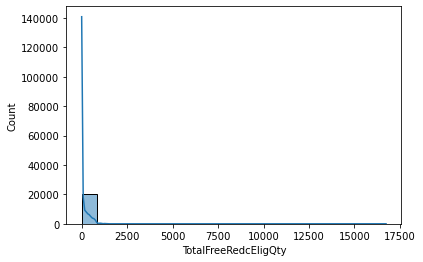

In [15]:
# creating a histogram to check for missing values
sns.histplot(df['TotalFreeRedcEligQty'], bins = 20, kde = True)

<AxesSubplot:xlabel='TotalFreeRedcEligQty'>

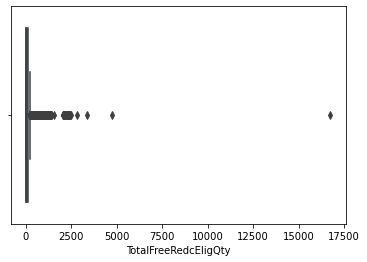

In [16]:
#using box plot to check for outliers
sns.boxplot(data=df,x=df['TotalFreeRedcEligQty'])

There is a clear outlier on the far right. There is also one more that may be an outlier

In [17]:
#dealing with outliers; checking lower and upper limits
Q1=df['TotalFreeRedcEligQty'].quantile(0.25)
Q3=df['TotalFreeRedcEligQty'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

0.0
98.0
98.0
-147.0 245.0


In [18]:
#creating new df with outliers removed
df_NoOutliers = df[df['TotalFreeRedcEligQty']< Upper_Whisker]

In [19]:
df_NoOutliers.shape

(17012, 39)

<AxesSubplot:xlabel='TotalFreeRedcEligQty', ylabel='Count'>

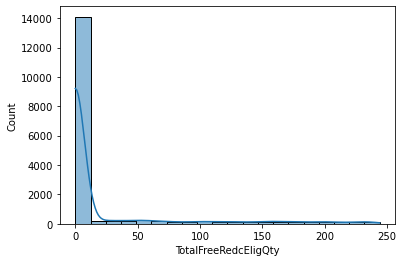

In [20]:
#using histogram to check for outliers in new df
sns.histplot(df_NoOutliers['TotalFreeRedcEligQty'], bins = 20, kde = True)

## Creating the data to plot

In [21]:
#aggregating the site county column to find the total number of TotalFreeRedcEligQty for each site 
# and making it into a dataframe
data_to_plot = df_NoOutliers.groupby('SiteCounty')['TotalFreeRedcEligQty'].sum().reset_index()

In [22]:
data_to_plot.head()

,SiteCounty,TotalFreeRedcEligQty
0,ANDERSON,5429
1,ANGELINA,0
2,ARANSAS,0
3,ATASCOSA,160
4,BANDERA,0


In [23]:
#Capitalizing the county names in the data set to match the topojson file
data_to_plot["SiteCounty"]=data_to_plot["SiteCounty"].str.capitalize()

## Finding the keys in the topojson

In [24]:
states_topo.keys()
# states_topo['objects'].keys()
states_topo['objects']["cb_2015_texas_county_20m"].keys()
states_topo['objects']["cb_2015_texas_county_20m"]['geometries'][0].keys()
# states_topo['objects']["cb_2015_texas_county_20m"]['geometries'][0]["properties"].keys()
# states_topo['objects']["cb_2015_texas_county_20m"]['geometries'][0]["properties"].keys()


dict_keys(['arcs', 'type', 'properties'])

## Plotting Choropleth Map

In [31]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = states_topo,
    topojson= 'objects.cb_2015_texas_county_20m',
    data = data_to_plot,
    columns = ['SiteCounty','TotalFreeRedcEligQty'],
    key_on = 'feature.properties.NAME',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Free/Reduced Price Eligibility Quantity").add_to(map)

folium.LayerControl().add_to(map)

In [26]:
map

# Discussing the results
1. Does the analysis answer any of your existing research questions?
The geographical analysis shows me that the counties that serve the most students who qualify for free and reduced price meals are located in the major cities in Texas: Dallas, San Antonio, Houston, and Austin. Surprisingly, Wichita Falls and a couple of other border counties also have relatively large concentrations.

2. Does the analysis lead you to any new research questions?
Are the counties who have the most total free/reduced price lunch students the same as the counties who have the largest proportion of free/reduced price students?
